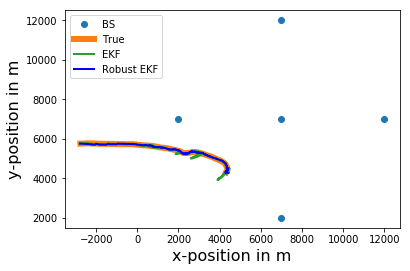

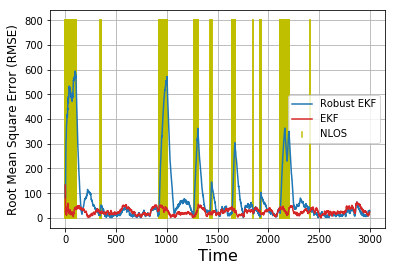

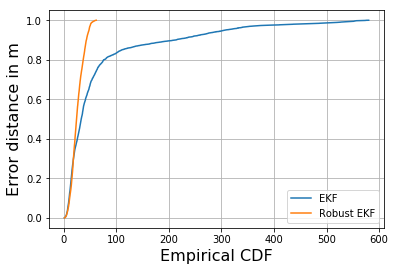

In [2]:
# Load parameters. The structs generated by set_parameters_book.m are
# loaded as Dictionaries
import scipy.io as sio
import numpy as np
import robustsp as rsp
from robustsp.RobustFiltering.examples.Auxiliary.create_environment_book import create_environment_book
from robustsp.RobustFiltering.examples.Auxiliary.set_parameters_book import *
import matplotlib.pyplot as plt

ekf_th = []
ekf_Hc = []
for ii in range(parameter['mc']):
    parameter['numbermc'] = ii

    # generate measurements
    parameter = create_environment_book(parameter,parameter['start'],parameter['sigma_v'])

    # generate random starting point
    randnvector = parameter['initial_sigma']*np.random.randn(4)
    theta_init  = parameter['start']+ randnvector

    # estimate positions using (robust) extended Kalman filter
    ekf_th.append(rsp.ekf_toa(parameter['MeasuredDistances'],theta_init,parameter['BS'],ekf)[0])
    ekf_Hc.append(rsp.ekf_toa_robust(parameter['MeasuredDistances'],theta_init,parameter['BS'],rekf)[0])

# Least-squares estimation
ekf_th_x = ekf_th[0][0,:]
ekf_th_y = ekf_th[0][1,:]

# Robust M-estimation
ekf_Hc_x = ekf_Hc[0][0,:]
ekf_Hc_y = ekf_Hc[0][1,:]


fig1 = plt.figure(0)
plt.plot(parameter['BS'][:,0],parameter['BS'][:,1],'o',lw=2, label='BS')
plt.plot(parameter['thx'], parameter['thy'],lw=6,label='True')
plt.plot(ekf_th_x, ekf_th_y, lw=2, label='EKF')
plt.plot(ekf_Hc_x, ekf_Hc_y, lw=2, label='Robust EKF',color='b')
plt.xlabel('x-position in m', size=16)
plt.ylabel('y-position in m', size=16)
plt.legend()

fig2 = plt.figure(1)
fig3 = plt.figure(2)

eval_ekf = rsp.eval_track(ekf_th, parameter, 'r', fig1,fig2,fig3)
eval_ekf_Hc = rsp.eval_track(ekf_Hc, parameter, 'b', fig1,fig2,fig3)
plt.show()